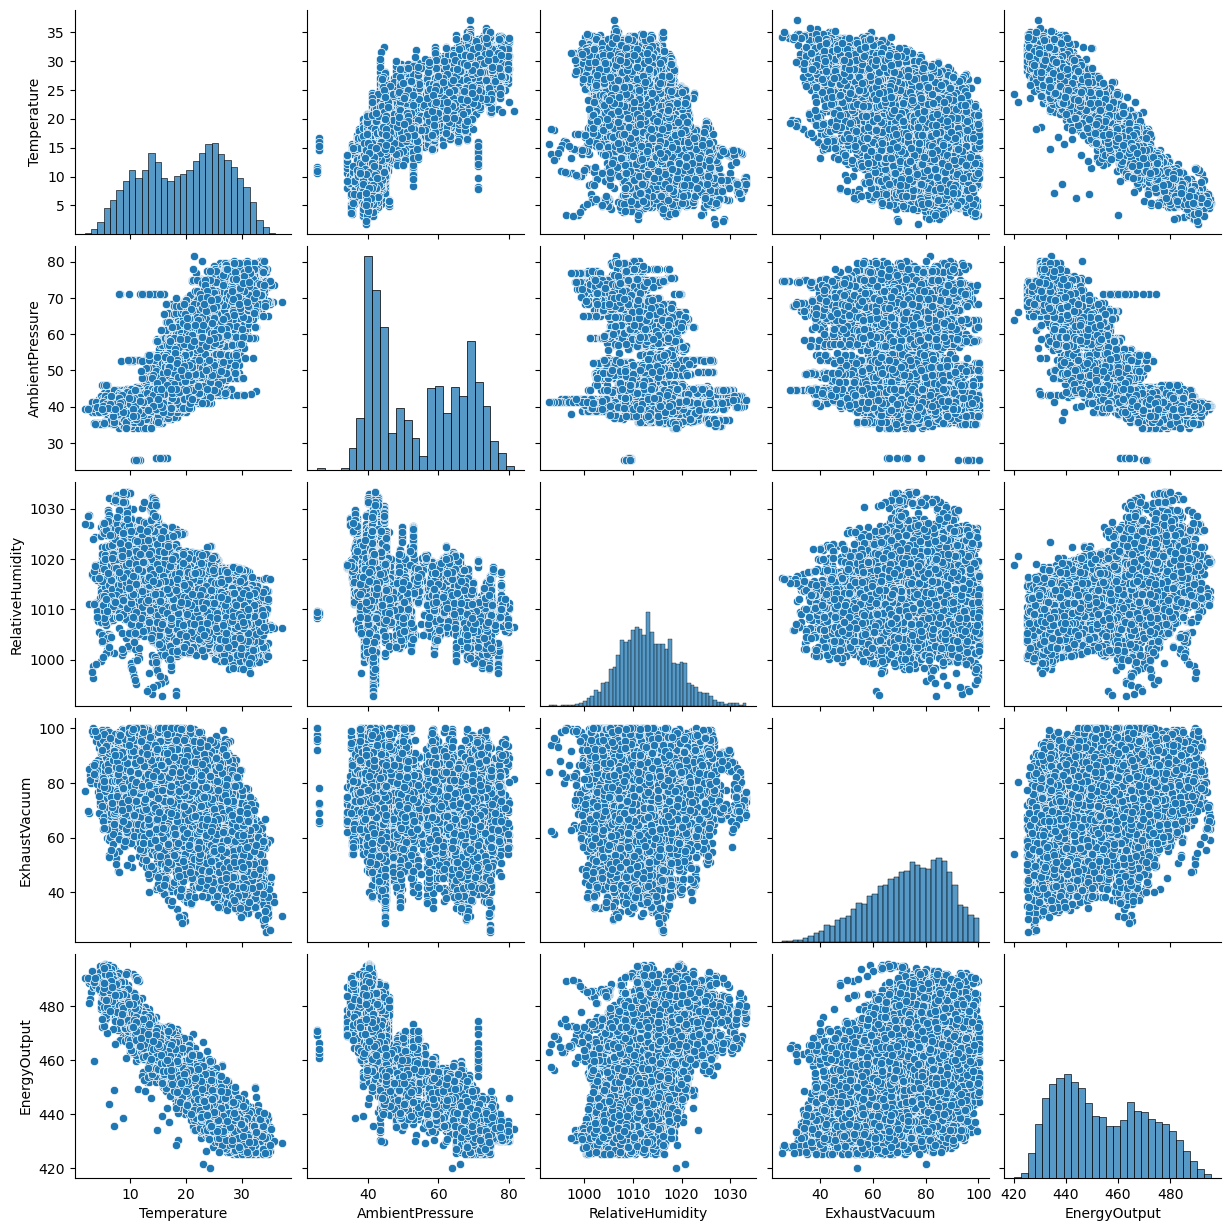

                   count         mean        std     min        25%       50%  \
Temperature       9568.0    19.651231   7.452473    1.81    13.5100    20.345   
AmbientPressure   9568.0    54.305804  12.707893   25.36    41.7400    52.080   
RelativeHumidity  9568.0  1013.259078   5.938784  992.89  1009.1000  1012.940   
ExhaustVacuum     9568.0    73.308978  14.600269   25.56    63.3275    74.975   
EnergyOutput      9568.0   454.365009  17.066995  420.26   439.7500   451.550   

                      75%      max  
Temperature         25.72    37.11  
AmbientPressure     66.54    81.56  
RelativeHumidity  1017.26  1033.30  
ExhaustVacuum       84.83   100.16  
EnergyOutput       468.43   495.76  
Temperature - R2 Score: 0.8974675847390023
AmbientPressure - R2 Score: 0.7651981388137588
RelativeHumidity - R2 Score: 0.2878204213683918
ExhaustVacuum - R2 Score: 0.15046367319500864
Multiple Regression Results:
MSE: 21.23985693822552
R2 Score: 0.9275484963869203
Polynomial Regression (Deg

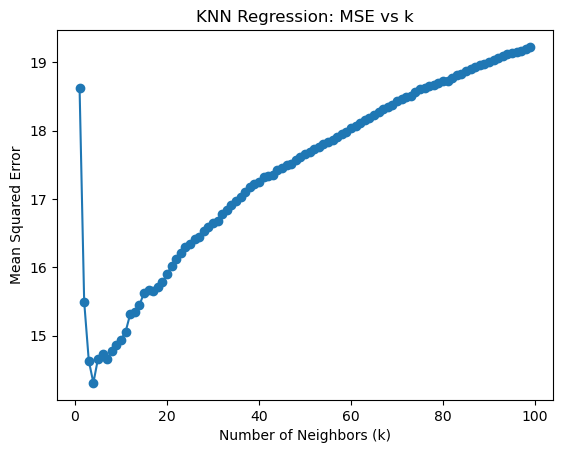

Best KNN Model (k=4):
MSE: 14.305669422675024
R2 Score: 0.9512017777295324


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Name: Bauyrzhan Abilda
# Github Username: b-abilda
# USC ID: 7773067264

# Verify dataset existence
data_dir = "data"
data_file = os.path.join(data_dir, "Folds5x2_pp.xlsx")
if not os.path.exists(data_file):
    raise FileNotFoundError(f"File '{data_file}' not found. Make sure it is uploaded and in the correct directory.")

# Load dataset
data = pd.read_excel(data_file, sheet_name=0)

# Rename columns for clarity
data.columns = ["Temperature", "AmbientPressure", "RelativeHumidity", "ExhaustVacuum", "EnergyOutput"]

# Exploratory Data Analysis (EDA)
sns.pairplot(data)
plt.show()

# Summary statistics
summary_stats = data.describe().T
print(summary_stats)

# Splitting Data
X = data.drop(columns=["EnergyOutput"])
y = data["EnergyOutput"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simple Linear Regression for each predictor
for col in X.columns:
    X_train_col = X_train_scaled[:, list(X.columns).index(col)].reshape(-1, 1)
    X_test_col = X_test_scaled[:, list(X.columns).index(col)].reshape(-1, 1)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_col, y_train)
    y_pred = lin_reg.predict(X_test_col)
    print(f"{col} - R2 Score: {r2_score(y_test, y_pred)}")

# Multiple Regression
multi_reg = LinearRegression()
multi_reg.fit(X_train_scaled, y_train)
y_pred_multi = multi_reg.predict(X_test_scaled)

print("Multiple Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_multi)}")
print(f"R2 Score: {r2_score(y_test, y_pred_multi)}")

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

print("Polynomial Regression (Degree 2) Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly)}")
print(f"R2 Score: {r2_score(y_test, y_pred_poly)}")

# KNN Regression
k_values = range(1, 100)
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_knn))

plt.plot(k_values, mse_values, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression: MSE vs k")
plt.show()

best_k = k_values[np.argmin(mse_values)]
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn_best = knn_best.predict(X_test_scaled)

print(f"Best KNN Model (k={best_k}):")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn_best)}")
print(f"R2 Score: {r2_score(y_test, y_pred_knn_best)}")
